In [6]:
%pip install pandas
%pip install seaborn
%pip install numpy
%pip install matplotlib

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("./lomba disiplin.csv", index_col='timestamp')

In [47]:
df.tail()

,kelas,guru,tanggal,kebersihan,kerapian,kelengkapan_fasilitas,kelengkapan_seragam,keaktifan,membangunkan
timestamp,,,,,,,,,
8/15/2024 18:10:06,8C,Tisya Nursafa Riyandiani,8/12/2024,75,75,60,75,75,66
8/15/2024 18:11:15,7C,Tisya Nursafa Riyandiani,8/13/2024,75,75,60,25,75,66
8/15/2024 19:54:22,8A,Ust. Habib Rizieq,8/13/2024,50,50,0,75,50,33
8/16/2024 5:22:16,7C,Dwi Okvitasari,8/12/2024,50,50,80,75,75,66
8/16/2024 5:24:04,8C,Dwi Okvitasari,8/12/2024,50,50,80,75,75,66


In [48]:
# df['kebersihan'].replace({'3. Bersih': 75, '2. Cukup Bersih': 50, '4. Sangat Bersih': 100, '1. Kurang Bersih':25}, inplace=True)
# df['kerapian'].replace({'3. Rapi': 75, '2. Cukup Rapi': 50, '4. Sangat Rapi': 100, '1. Kurang Rapi':25}, inplace=True)
# df['kelengkapan_fasilitas'].replace({1: 20, 2: 40, 3: 60, 4: 80, 5: 100}, inplace=True)
# df['kelengkapan_seragam'].replace({'Semua Lengkap Memakai Seragam & Sepatu': 75, 'Tidak Lengkap Memakai Seragam & Sepatu': 25}, inplace=True)
# df['keaktifan'].replace({'3. Aktif': 75, '2. Cukup Aktif': 50, '4. Sangat Aktif': 100, '1. Kurang Aktif':25}, inplace=True)
# df['membangunkan'].replace({'Membangunkan': 66, 'Membiarkan': 33, 'Terus/Selalu Membangunkan': 99}, inplace=True)

In [37]:
df.columns

Index(['kelas', 'guru', 'tanggal', 'kebersihan', 'kerapian',
       'kelengkapan_fasilitas', 'kelengkapan_seragam', 'keaktifan',
       'membangunkan'],
      dtype='object')

In [71]:
agg = df.groupby('kelas').mean(['kebersihan', 'kerapian',
       'kelengkapan_fasilitas', 'kelengkapan_seragam', 'keaktifan',
       'membangunkan'])

In [75]:
agg

,kebersihan,kerapian,kelengkapan_fasilitas,kelengkapan_seragam,keaktifan,membangunkan,rata2_final
kelas,,,,,,,
7A,66.071429,66.071429,77.142857,71.428571,67.857143,61.285714,68.309524
7B,55.357143,55.357143,74.285714,67.857143,60.714286,54.214286,61.297619
7C,62.500000,61.363636,74.545455,56.818182,44.318182,67.500000,61.174242
8A,63.750000,60.000000,69.000000,67.500000,65.000000,62.700000,64.658333
8B,58.333333,55.555556,73.333333,61.111111,56.944444,60.500000,60.962963
8C,60.294118,63.235294,75.294118,69.117647,61.764706,64.058824,65.627451
9A,72.500000,67.500000,60.000000,60.000000,67.500000,46.200000,62.283333
9B,62.500000,62.500000,58.000000,60.000000,60.000000,46.200000,58.200000
9C,61.764706,63.235294,61.176471,75.000000,64.705882,52.411765,63.049020


In [86]:
agg['rata2_final'] = agg.mean(axis=1)
agg['rata2_final_2'] = agg[['kebersihan', 'kerapian', 'keaktifan']].mean(axis=1)

In [87]:
agg.sort_values('rata2_final', ascending=False).round(2)

,kebersihan,kerapian,kelengkapan_fasilitas,kelengkapan_seragam,keaktifan,membangunkan,rata2_final,rata2_final_2
kelas,,,,,,,,
7A,66.07,66.07,77.14,71.43,67.86,61.29,68.07,66.67
8C,60.29,63.24,75.29,69.12,61.76,64.06,65.08,61.76
8A,63.75,60.00,69.00,67.50,65.00,62.70,64.41,62.92
9A,72.50,67.50,60.00,60.00,67.50,46.20,63.27,69.17
9C,61.76,63.24,61.18,75.00,64.71,52.41,63.08,63.24
7B,55.36,55.36,74.29,67.86,60.71,54.21,60.70,57.14
7C,62.50,61.36,74.55,56.82,44.32,67.50,60.44,56.06
8B,58.33,55.56,73.33,61.11,56.94,60.50,60.39,56.94
9B,62.50,62.50,58.00,60.00,60.00,46.20,58.70,61.67


In [89]:
agg.describe()

,kebersihan,kerapian,kelengkapan_fasilitas,kelengkapan_seragam,keaktifan,membangunkan,rata2_final,rata2_final_2
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,62.563414,61.646484,69.197550,65.425850,60.978294,57.230065,62.681579,61.729397
std,4.848576,4.169338,7.468660,6.155569,7.205872,7.784601,2.923351,4.464295
min,55.357143,55.357143,58.000000,56.818182,44.318182,46.200000,58.695238,56.060606
25%,60.294118,60.000000,61.176471,60.000000,60.000000,52.411765,60.443723,57.142857
50%,62.500000,62.500000,73.333333,67.500000,61.764706,60.500000,63.075630,61.764706
75%,63.750000,63.235294,74.545455,69.117647,65.000000,62.700000,64.409524,63.235294
max,72.500000,67.500000,77.142857,75.000000,67.857143,67.500000,68.074830,69.166667


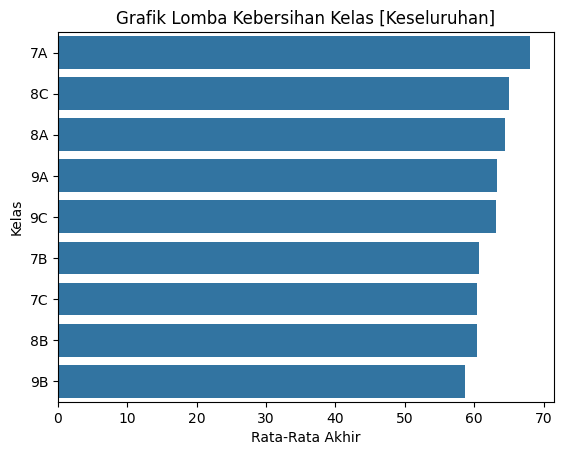

In [88]:
sns.barplot(data=agg['rata2_final'].sort_values(ascending=False), orient='h')
plt.title('Grafik Lomba Kebersihan Kelas [Keseluruhan]')
plt.xlabel('Rata-Rata Akhir')
plt.ylabel('Kelas');

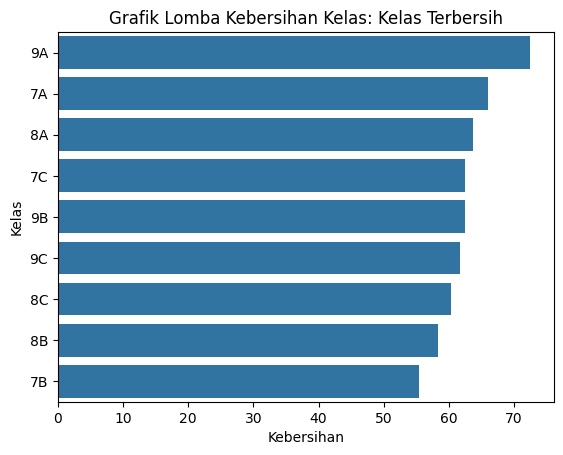

In [78]:
sns.barplot(data=agg['kebersihan'].sort_values(ascending=False), orient='h')
plt.title('Grafik Lomba Kebersihan Kelas: Kelas Terbersih')
plt.xlabel('Kebersihan')
plt.ylabel('Kelas');

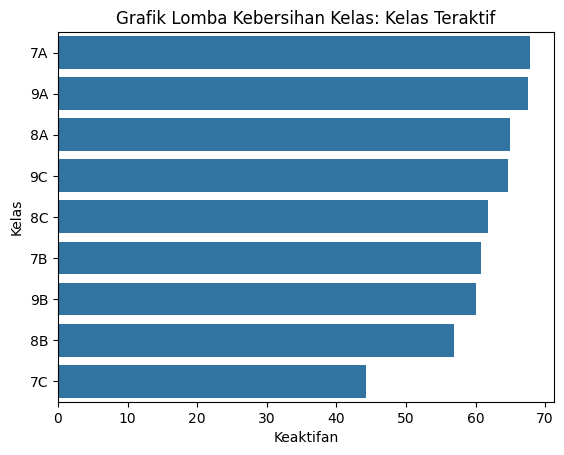

In [79]:
sns.barplot(data=agg['keaktifan'].sort_values(ascending=False), orient='h')
plt.title('Grafik Lomba Kebersihan Kelas: Kelas Teraktif')
plt.xlabel('Keaktifan')
plt.ylabel('Kelas');

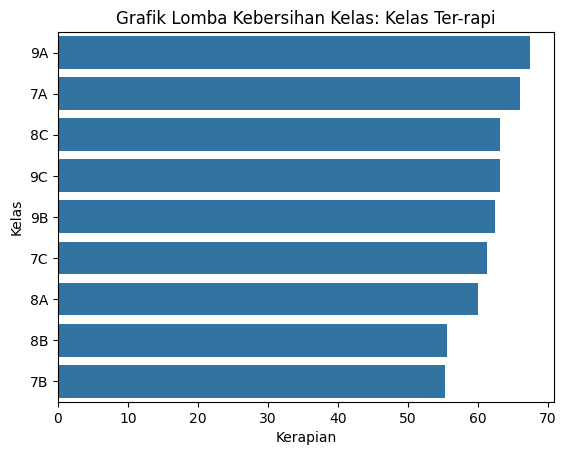

In [80]:
sns.barplot(data=agg['kerapian'].sort_values(ascending=False), orient='h')
plt.title('Grafik Lomba Kebersihan Kelas: Kelas Ter-rapi')
plt.xlabel('Kerapian')
plt.ylabel('Kelas');